# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Fetch current BTC price
btc_fetch = requests.get(btc_url).json()
btc_fetch
# Fetch current ETH price
eth_fetch = requests.get(eth_url).json()
eth_fetch
# Compute current value of my crpto
my_btc_value = btc_fetch['data']['1']['quotes']['CAD']['price']
my_eth_value = eth_fetch['data']['1027']['quotes']['CAD']['price']
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"the current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $31086.56
the current value of your 5.3 ETH is $2201.39


In [7]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [9]:
# Format current date as ISO format
today = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()
end = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()
# Set the tickers
tickers = "AGG", "SPY"

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = end
).df
df_portfolio.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-01-20 05:00:00+00:00,100.17,100.26,99.89,100.09,6095775,18911,100.069086,AGG
2023-01-20 05:00:00+00:00,390.10,396.04,388.38,395.88,91806356,505915,392.598891,SPY


In [10]:
# Reorganize the DataFrame
# Separate ticker data
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)               


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                             open    high    low   close   volume trade_count   
timestamp                                                                       
2023-01-20 05:00:00+00:00  100.17  100.26  99.89  100.09  6095775       18911   

                                         SPY                          \
                                 vwap   open    high     low   close   
timestamp                                                              
2023-01-20 05:00:00+00:00  100.069086  390.1  396.04  388.38  395.88   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-01-20 05:00:00+00:00  91806356      505915  392.598891

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

In [12]:
# Compute the current value of shares
my_agg_value = float(df_portfolio["AGG"]["close"])
my_spy_value = float(df_portfolio["SPY"]["close"])
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $395.88
The current value of your 200 AGG shares is $100.09


### Savings Health Analysis

In [13]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
total_shares_values = agg_close_price +spy_close_price
data_value = {
    'amount': [crypto_assets, total_shares_values],
    'asset': ["crypto", "shares"]
}
# Create savings DataFrame
df_savings = pd.DataFrame(data_value).set_index('asset')

# Display savings DataFrame
display(df_savings)

,amount
asset,
crypto,33287.95041
shares,495.97000


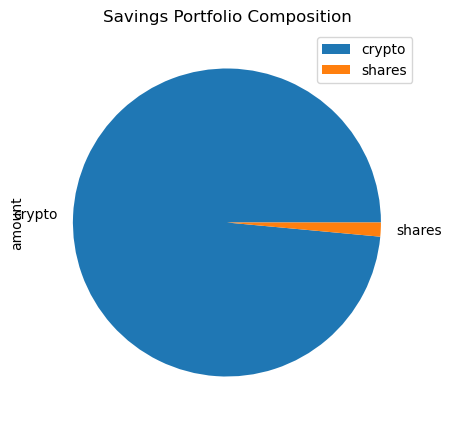

In [14]:
# Plot savings pie chart
pie_plot = df_savings.plot.pie (y= 'amount', title="Savings Portfolio Composition", figsize=(5,5))

In [15]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = df_savings['amount'].sum()

# Validate saving health
if savings > emergency_fund:
    print(f"Congratulations! You have enough money in your emergency fund.")
elif savings == emergency_fund:
    print(f"You have reached your financial goal!")
else:
    print(f"You're ${emergency_fund - savings:0.2f} away from achieving your financial goal. Keep saving!")

You're $2216.08 away from achieving your financial goal. Keep saving!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [16]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [17]:
# Get 5 years' worth of historical data for SPY and AGG
ticker = ["SPY", "AGG"]
timeframe = "1Day"
start_date = pd.Timestamp("2018-01-20", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-01-20", tz="America/New_York").isoformat()
df_stock_data = alpaca.get_bars(
    ticker,
    timeframe, 
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol',axis =1)
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol',axis=1)


# Concatenate the ticker DataFrames
df_ticker = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-01-22 05:00:00+00:00,108.22,108.2999,108.11,108.14,3983314,14537,108.172245,AGG
2018-01-23 05:00:00+00:00,108.33,108.4401,108.29,108.40,4775740,12353,108.372149,AGG
2018-01-24 05:00:00+00:00,108.25,108.3200,108.15,108.29,2362470,10803,108.259722,AGG
2018-01-25 05:00:00+00:00,108.26,108.5700,108.19,108.57,9858098,19793,108.434750,AGG
2018-01-26 05:00:00+00:00,108.51,108.5100,108.27,108.37,3808163,13216,108.364405,AGG


In [18]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [19]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.tail()

AGG                                      \
                             open     high       low   close   volume   
timestamp                                                               
2023-01-13 05:00:00+00:00  100.02  100.260   99.8321   99.92  6470017   
2023-01-17 05:00:00+00:00   99.74   99.960   99.6500   99.74  7982214   
2023-01-18 05:00:00+00:00  100.76  100.875  100.3700  100.73  7779527   
2023-01-19 05:00:00+00:00  100.73  100.730  100.3300  100.50  8633859   
2023-01-20 05:00:00+00:00  100.17  100.260   99.8900  100.09  6095775   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2023-01-13 05:00:00+00:00       22835  100.045651    -0.003689  393.62   
2023-01-17 05:00:00+00:00       34158   99.800510    -0.001801  398.48   
2023-01-18 05:00:00+00:00       26696  100.664398     0.009926  399.01   
2023-01-19 05:00:00+00:00       23638  100.504973    -0.002283  389.36   
2023-01-20 05:00:00+00:00       18911  100.069086    -0.004080  390.10   

                                                                         \
                             high     low   close    volume trade_count   
timestamp                                                                 
2023-01-13 05:00:00+00:00  399.10  393.34  398.50  63634516      465835   
2023-01-17 05:00:00+00:00  400.23  397.06  397.77  62485876      436151   
2023-01-18 05:00:00+00:00  400.12  391.28  391.49  99651010      643581   
2023-01-19 05:00:00+00:00  391.08  387.26  388.64  87066127      549053   
2023-01-20 05:00:00+00:00  396.04  388.38  395.88  91806356      505915   

                                                    
                                 vwap daily_return  
timestamp                                           
2023-01-13 05:00:00+00:00  396.840190     0.003879  
2023-01-17 05:00:00+00:00  398.195099    -0.001832  
2023-01-18 05:00:00+00:00  394.553482    -0.015788  
2023-01-19 05:00:00+00:00  389.264685    -0.007280  
2023-01-20 05:00:00+00:00  392.598891     0.018629

In [20]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\Expli\Bootcamp\USYD-VIRT-FIN-PT-12-2022-U-LOLC-main\05-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004070,0.998594,1.006952,1.001605,1.001390,1.004934,0.997409,1.004127,0.994862,1.006735,...,0.996268,1.001199,1.000939,0.997935,0.998952,0.996626,0.990578,1.010744,0.993521,1.008497
2,1.009782,0.998618,1.014345,1.000408,1.005011,1.002750,0.985534,1.007960,0.988238,1.007897,...,0.994380,0.996769,1.005948,0.997647,0.993576,1.007443,0.986029,1.008609,0.995404,1.007428
3,1.007561,0.993675,1.013154,1.001462,1.007552,1.007751,0.983879,1.013556,0.983882,0.995530,...,0.991653,0.995589,1.008696,0.988680,0.995876,1.016223,0.990463,1.001278,0.995490,1.013181
4,1.011180,0.999741,1.004948,0.995946,1.004221,1.007535,0.979611,1.014700,0.986212,0.997095,...,0.988199,0.992144,1.006091,1.001337,0.984428,1.017738,0.995865,1.003516,0.994653,1.012773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.283706,3.959560,2.198369,2.662850,2.628485,2.451887,1.056364,1.199696,3.338849,1.973531,...,1.179079,4.548144,3.509144,3.263409,2.375580,1.465842,3.800309,3.126552,2.828825,1.085045
7557,3.284040,3.973076,2.203712,2.686254,2.627459,2.437489,1.054558,1.203976,3.305047,1.985166,...,1.179329,4.582771,3.492072,3.263601,2.366220,1.477705,3.815492,3.123524,2.860375,1.085136
7558,3.286450,3.990308,2.221611,2.682400,2.601573,2.439824,1.052197,1.214982,3.348824,1.990555,...,1.183382,4.528818,3.473938,3.250062,2.383700,1.481981,3.801108,3.119639,2.829729,1.101546
7559,3.273595,4.006232,2.228962,2.697028,2.590699,2.438125,1.055001,1.210536,3.372590,1.975999,...,1.196519,4.518588,3.470918,3.249695,2.361240,1.471764,3.811134,3.134510,2.824128,1.105264


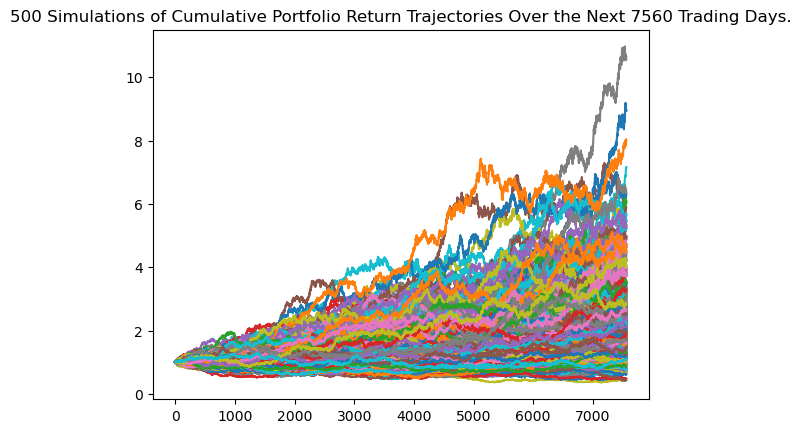

In [21]:
# Plot simulation outcomes
line_plot = MC_thirtyyear.plot_simulation()

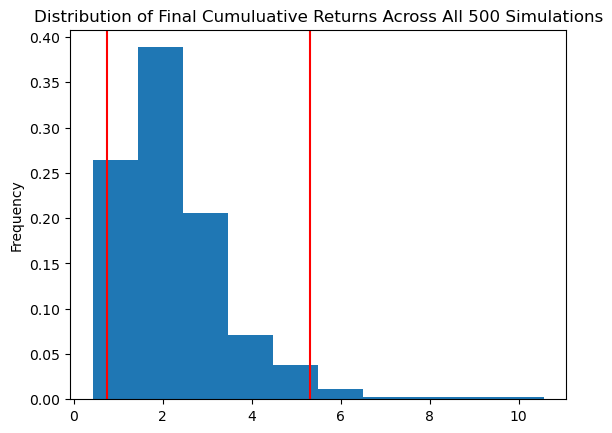

In [22]:
# Plot probability distribution and confidence intervals
dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_mc = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(summary_mc)

count           500.000000
mean              2.258057
std               1.244067
min               0.429925
25%               1.420287
50%               1.945562
75%               2.764833
max              10.567086
95% CI Lower      0.753081
95% CI Upper      5.305058
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [24]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_upper = round(summary_mc[9]*initial_investment,2) 
ci_lower = round(summary_mc[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $15061.62 and $106101.16


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [25]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_upper_50 = round(summary_mc[9]*initial_investment,2) 
ci_lower_50 = round(summary_mc[8]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower_50} and ${ci_upper_50}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $22592.43 and $159151.74


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [26]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns


#### Running a Monte Carlo simulation to forecast 5 years cumulative returns


In [27]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [28]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [30]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")